In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Objective/Goal:**
The objective is to determine whether the company should:

Implement the new page or
Keep the old page
Run the experiment longer before making a decision


In [92]:
import pandas as pd
import numpy as np

**Data Features:**

user_id → Unique identifier for each user
timestamp → Time of visit
group → Indicates whether the user was in the control or treatment group
landing_page → The version of the page the user saw (new or old)
converted → Whether the user converted (1 = Yes, 0 = No)

**Groups Variation:**
Control Group → Users who saw the old landing page
Treatment Group → Users who saw the new landing page


In [93]:
df_ab = pd.read_csv("/content/drive/MyDrive/ecommerce_ab_testing_2022_dataset1/ab_data.csv")
df_ab.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
5,936923,20:49.1,control,old_page,0
6,679687,26:46.9,treatment,new_page,1
7,719014,48:29.5,control,old_page,0
8,817355,58:09.0,treatment,new_page,1
9,839785,11:06.6,treatment,new_page,1


In [94]:
df_ab.shape

(294480, 5)

In [95]:
df_countries = pd.read_csv("/content/drive/MyDrive/ecommerce_ab_testing_2022_dataset1/countries.csv")
df_countries.head(10)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
5,909908,UK
6,811617,US
7,938122,US
8,887018,US
9,820683,US


In [96]:

df_countries.shape

(290586, 2)

In [97]:
df = df_ab.merge(df_countries, on="user_id", how="left")
df.shape


(294482, 6)

In [98]:
df.head(10)

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US
5,936923,20:49.1,control,old_page,0,US
6,679687,26:46.9,treatment,new_page,1,CA
7,719014,48:29.5,control,old_page,0,US
8,817355,58:09.0,treatment,new_page,1,UK
9,839785,11:06.6,treatment,new_page,1,CA


In [99]:
df.isnull().sum()

,0
user_id,0
timestamp,0
group,0
landing_page,0
converted,0
country,0


In [100]:
df.duplicated(subset=['user_id']).sum()

np.int64(3897)

In [101]:
df = df.drop_duplicates(subset=['user_id'], keep='first')

df.duplicated(subset=['user_id']).sum()

np.int64(0)

In [102]:
df.head(20)

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US
5,936923,20:49.1,control,old_page,0,US
6,679687,26:46.9,treatment,new_page,1,CA
7,719014,48:29.5,control,old_page,0,US
8,817355,58:09.0,treatment,new_page,1,UK
9,839785,11:06.6,treatment,new_page,1,CA


In [103]:
print(df['country'].value_counts())


country
US    203620
UK     72466
CA     14499
Name: count, dtype: int64


In [104]:
print("\nUnique values per column:")
print(df.nunique())



Unique values per column:
user_id         290585
timestamp        35991
group                2
landing_page         2
converted            2
country              3
dtype: int64


## **Mismatching and missing variables:**

In [105]:
mismatch = df[(df['group'] == 'control') & (df['landing_page'] != 'old_page') |
              (df['group'] == 'treatment') & (df['landing_page'] != 'new_page')]
print(f"Number of mismatched entries: {len(mismatch)}")


Number of mismatched entries: 2044


In [106]:
mismatch.head(10)

,user_id,timestamp,group,landing_page,converted,country
22,767017,58:15.0,control,new_page,0,US
240,733976,11:16.4,control,new_page,0,US
308,857184,34:59.8,treatment,old_page,0,US
327,686623,26:40.7,treatment,old_page,0,US
357,856078,29:30.4,treatment,old_page,0,US
490,808613,44:01.3,control,new_page,0,US
685,666385,11:54.8,treatment,old_page,0,US
713,748761,47:44.4,treatment,old_page,0,US
776,820951,42:54.8,treatment,old_page,0,US
846,637639,09:52.7,control,new_page,1,US


In [107]:
df = df.drop(mismatch.index)

print("After dropping mismatched entries:", df.shape)


After dropping mismatched entries: (288541, 6)


In [108]:
df.head(10)

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US
5,936923,20:49.1,control,old_page,0,US
6,679687,26:46.9,treatment,new_page,1,CA
7,719014,48:29.5,control,old_page,0,US
8,817355,58:09.0,treatment,new_page,1,UK
9,839785,11:06.6,treatment,new_page,1,CA


In [109]:
mismatch_after = df[(df['group'] == 'control') & (df['landing_page'] != 'old_page') |
              (df['group'] == 'treatment') & (df['landing_page'] != 'new_page')]
print(f"Number of mismatched entries: {len(mismatch_after)}")


Number of mismatched entries: 0


# **Rechecking groups Vs Variants**

In [110]:
print(df['group'].value_counts())
print(df['landing_page'].value_counts())


group
treatment    144315
control      144226
Name: count, dtype: int64
landing_page
new_page    144315
old_page    144226
Name: count, dtype: int64


## **Addressing Timestamp**

In [111]:

print("Date range:", df['timestamp'].min(), "to", df['timestamp'].max())

Date range: 00:00.0 to 59:59.9


In [112]:
# Split the timestamp into components
df['minutes'] = df['timestamp'].str.split(':').str[0].astype(int)
df['seconds'] = df['timestamp'].str.split(':').str[1].astype(float)

# Compute total seconds
df['total_seconds'] = df['minutes'] * 60 + df['seconds']

# Display the first few rows to verify
df[['timestamp', 'minutes', 'seconds', 'total_seconds']].head()


,timestamp,minutes,seconds,total_seconds
0,11:48.6,11,48.6,708.6
1,01:45.2,1,45.2,105.2
2,55:06.2,55,6.2,3306.2
3,28:03.1,28,3.1,1683.1
4,52:26.2,52,26.2,3146.2


In [113]:
df.head(10)

,user_id,timestamp,group,landing_page,converted,country,minutes,seconds,total_seconds
0,851104,11:48.6,control,old_page,0,US,11,48.6,708.6
1,804228,01:45.2,control,old_page,0,US,1,45.2,105.2
2,661590,55:06.2,treatment,new_page,0,US,55,6.2,3306.2
3,853541,28:03.1,treatment,new_page,0,US,28,3.1,1683.1
4,864975,52:26.2,control,old_page,1,US,52,26.2,3146.2
5,936923,20:49.1,control,old_page,0,US,20,49.1,1249.1
6,679687,26:46.9,treatment,new_page,1,CA,26,46.9,1606.9
7,719014,48:29.5,control,old_page,0,US,48,29.5,2909.5
8,817355,58:09.0,treatment,new_page,1,UK,58,9.0,3489.0
9,839785,11:06.6,treatment,new_page,1,CA,11,6.6,666.6


In [114]:
print(df['group'].value_counts())
print(df['landing_page'].value_counts())
print(df['converted'].value_counts())
print(df['country'].value_counts())


group
treatment    144315
control      144226
Name: count, dtype: int64
landing_page
new_page    144315
old_page    144226
Name: count, dtype: int64
converted
0    254058
1     34483
Name: count, dtype: int64
country
US    202186
UK     71961
CA     14394
Name: count, dtype: int64


# **Visualizing using Country Factor**

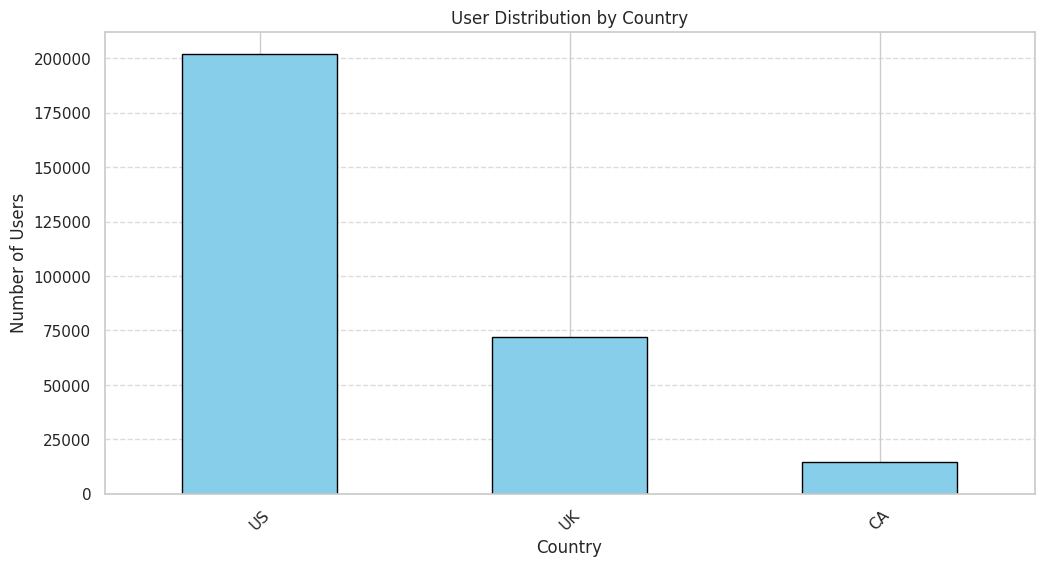

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
df['country'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.title("User Distribution by Country")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

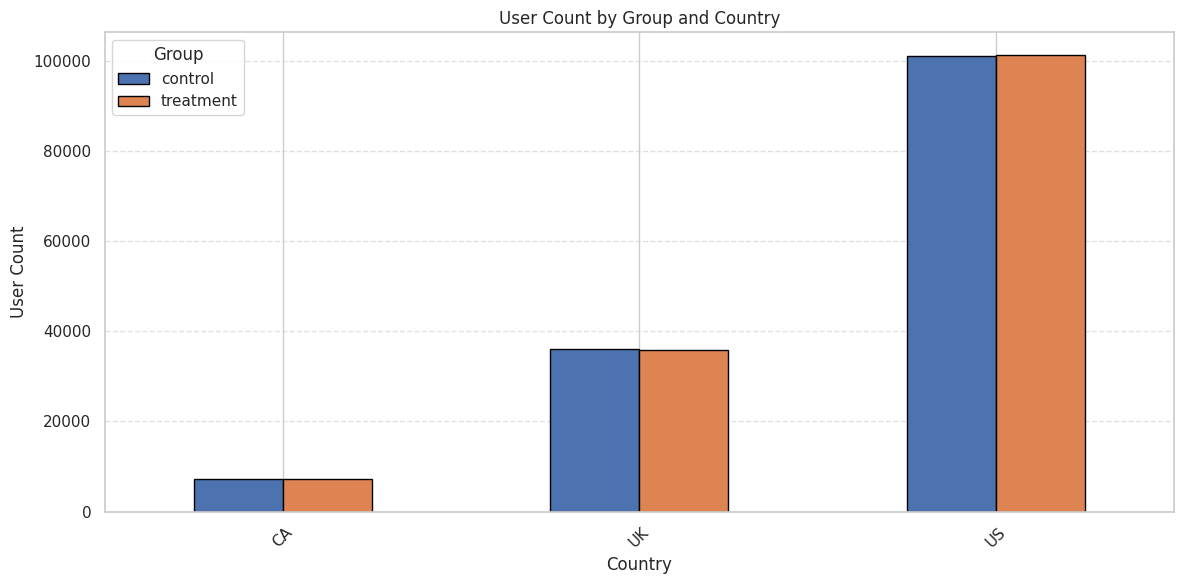

In [116]:
country_group_counts = df.groupby(['country', 'group']).size().unstack()
country_group_counts.plot(kind='bar', figsize=(12, 6), edgecolor='black')

plt.title("User Count by Group and Country")
plt.ylabel("User Count")
plt.xlabel("Country")
plt.legend(title="Group")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## **Finding HAUs**

In [117]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%M:%S.%f', errors='coerce')


df['hour'] = df['timestamp'].dt.hour
hau = df.groupby(['hour', 'group'])['user_id'].nunique().reset_index()
hau.columns = ['hour','group','unique_users']
print(hau)

   hour      group  unique_users
0     0    control        144226
1     0  treatment        144315


## **Overall Conversion rate**

In [118]:

overall_conv = df['converted'].mean()
print(f"Overall Conversion Rate: {overall_conv:.4f}")


Overall Conversion Rate: 0.1195


## **Conversion Rate by Group **

In [119]:

group_conv = df.groupby('group')['converted'].mean()
print("\nConversion Rate by Group:")
print(group_conv)



Conversion Rate by Group:
group
control      0.120290
treatment    0.118726
Name: converted, dtype: float64


## **Conversion Rate by Landing page(old vs new)**

In [120]:

page_conv = df.groupby('landing_page')['converted'].mean()
print("\nConversion Rate by Landing Page:")
print(page_conv)



Conversion Rate by Landing Page:
landing_page
new_page    0.118726
old_page    0.120290
Name: converted, dtype: float64


## **Conversion Rate by Country**

In [121]:

country_conv = df.groupby('country')['converted'].mean()
print("\nConversion Rate by Country:")
print(country_conv)



Conversion Rate by Country:
country
CA    0.115256
UK    0.120496
US    0.119459
Name: converted, dtype: float64


In [122]:
# Average time spent (engagement)
avg_time = df['total_seconds'].mean()
print(f"\nAverage Time Spent (seconds): {avg_time:.2f}")

# Average time spent by converted vs not converted
time_conv = df.groupby('converted')['total_seconds'].mean()
print("\nAverage Time Spent by Conversion Status:")
print(time_conv)



Average Time Spent (seconds): 1803.20

Average Time Spent by Conversion Status:
converted
0    1803.643588
1    1799.935290
Name: total_seconds, dtype: float64


## **Visualising Group Conversion**

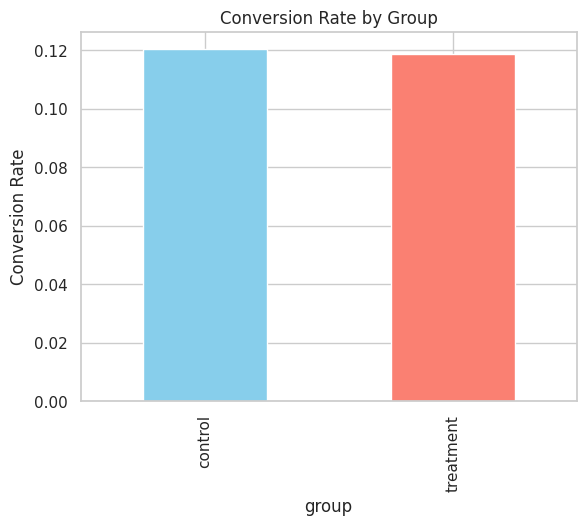

In [123]:
import matplotlib.pyplot as plt


group_conv.plot(kind='bar', title="Conversion Rate by Group", color=['skyblue','salmon'])
plt.ylabel("Conversion Rate")
plt.show()



## **Visualising Landing page Conversion**

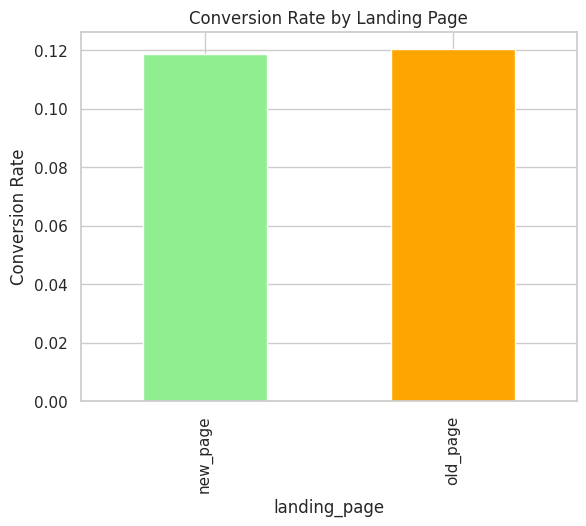

In [124]:

page_conv.plot(kind='bar', title="Conversion Rate by Landing Page", color=['lightgreen','orange'])
plt.ylabel("Conversion Rate")
plt.show()


## **Visualising Country Conversion**

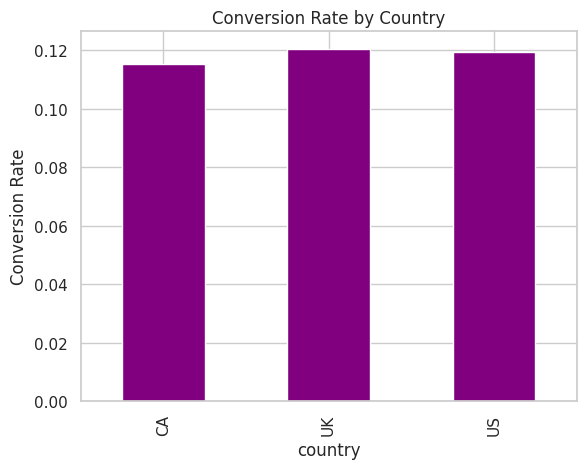

In [125]:

country_conv.plot(kind='bar', title="Conversion Rate by Country", color='purple')
plt.ylabel("Conversion Rate")
plt.show()


## **Funnel Analysis**

In [126]:
total_users = df['user_id'].nunique()
converted_users = df[df['converted'] == 1]['user_id'].nunique()

funnel = {
    "Landed on Page": total_users,
    "Converted": converted_users
}

print("Basic Funnel:", funnel)


Basic Funnel: {'Landed on Page': 288541, 'Converted': 34483}


In [127]:
engaged_users = df[df['total_seconds'] > 30]['user_id'].nunique()

funnel_ext = {
    "Landed on Page": total_users,
    "Engaged (>30s)": engaged_users,
    "Converted": converted_users
}

print("Extended Funnel:", funnel_ext)


Extended Funnel: {'Landed on Page': 288541, 'Engaged (>30s)': 286142, 'Converted': 34483}


## **Visualizing Funnel analysis**

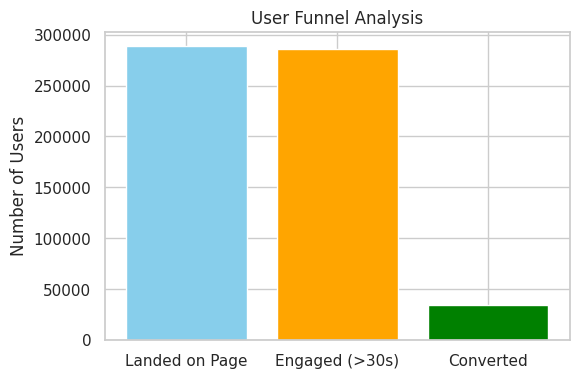

In [128]:
import matplotlib.pyplot as plt
stages = list(funnel_ext.keys())
values = list(funnel_ext.values())

plt.figure(figsize=(6,4))
plt.bar(stages, values, color=['skyblue','orange','green'])
plt.title("User Funnel Analysis")
plt.ylabel("Number of Users")
plt.show()


## **Group wise Funnel Analysis**

In [129]:

group_funnel = df.groupby('group').agg(
    total_users=('user_id', 'nunique'),
    engaged_users=('user_id', lambda x: df.loc[x.index, 'total_seconds'].apply(lambda y: y > 30).sum()),
    converted_users=('converted', lambda x: (x == 1).sum())
)


group_funnel.columns = ['Landed on Page', 'Engaged (>30s)', 'Converted']

print("\nGroup-wise Funnel Analysis:")
print(group_funnel)


Group-wise Funnel Analysis:
           Landed on Page  Engaged (>30s)  Converted
group                                               
control            144226          143019      17349
treatment          144315          143123      17134


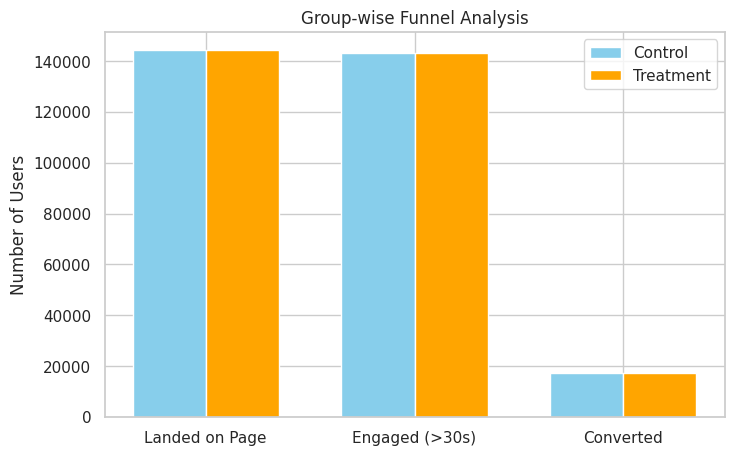

In [130]:



group_funnel = {
    'control': [144226, 143019, 17349],
    'treatment': [144315, 143123, 17134]
}

stages = ['Landed on Page', 'Engaged (>30s)', 'Converted']

x = range(len(stages))
bar_width = 0.35

plt.figure(figsize=(8,5))


plt.bar([p - bar_width/2 for p in x], group_funnel['control'],
        width=bar_width, label='Control', color='skyblue')


plt.bar([p + bar_width/2 for p in x], group_funnel['treatment'],
        width=bar_width, label='Treatment', color='orange')

plt.xticks(x, stages)
plt.ylabel("Number of Users")
plt.title("Group-wise Funnel Analysis")
plt.legend()
plt.show()


## **Statistical Analysis**

In [131]:
conversion_rates = df.groupby('group')['converted'].agg(['mean', 'count'])
conversion_rates.rename(columns={'mean': 'conversion_rate'}, inplace=True)

print(conversion_rates)


           conversion_rate   count
group                             
control           0.120290  144226
treatment         0.118726  144315


In [132]:
# Conversion rates
control_rate = group_funnel['control'][2] / group_funnel['control'][0]
treatment_rate = group_funnel['treatment'][2] / group_funnel['treatment'][0]

print("Control Conversion Rate:", round(control_rate*100, 2), "%")
print("Treatment Conversion Rate:", round(treatment_rate*100, 2), "%")

Control Conversion Rate: 12.03 %
Treatment Conversion Rate: 11.87 %


## **Results or Insightsimport statsmodels.api as sm
The control group (old page) had a slightly higher conversion rate than the treatment group (new page). However, the difference is very small.

At first glance, it may seem that the old page is performing slightly better, but we need statistical tests to determine whether this difference is significant or just random noise.



In [133]:
import statsmodels.api as sm


# assume df is your dataset with columns: group, converted

# Step 1: count conversions per group
conversion_counts = df.groupby("group")["converted"].agg(['sum','count'])

# values
convert_control = conversion_counts.loc['control', 'sum']
n_control = conversion_counts.loc['control', 'count']

convert_treatment = conversion_counts.loc['treatment', 'sum']
n_treatment = conversion_counts.loc['treatment', 'count']

# Step 2: run z-test for proportions
z_stat, p_val = sm.stats.proportions_ztest([convert_control, convert_treatment],
                                           [n_control, n_treatment])

print("Z-statistic:", z_stat)
print("p-value:", p_val)


Z-statistic: 1.294922131961739
p-value: 0.19534709281210638


## **Interpretation:**
Z-statistic = 1.29 → The difference between the control and treatment conversion rates is small.

p-value = 0.195 (> 0.05) → We fail to reject the null hypothesis.

This means there is no statistically significant difference between the old page (control) and new page (treatment).

The observed difference in conversion could be due to random chance rather than a real effect.

In practice, since the new page doesn’t show significant improvement, we should continue with the old page until further evidence suggests otherwise.

In [134]:
import scipy.stats as stats

# Create a contingency table
contingency = pd.crosstab(df['group'], df['converted'])

# Run Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-square Statistic: 1.6619931953097509
p-value: 0.19733442139490567
Degrees of freedom: 1
Expected frequencies:
 [[126989.8181125  17236.1818875]
 [127068.1818875  17246.8181125]]


## **Interpretation of Chi-Square Test:**

Chi-square Statistic = 1.66 → This value is relatively small, indicating a small difference between the observed and expected frequencies in the contingency table.

p-value = 0.197 (> 0.05) → Similar to the Z-test, the p-value is greater than the significance level (commonly 0.05). This means we fail to reject the null hypothesis of no association between the group (control vs. treatment) and conversion status.

Conclusion: The Chi-square test also suggests there is no statistically significant difference in conversion rates between the old and new landing pages. The observed difference is likely due to random chance.

In [135]:
from scipy.stats import ttest_ind

# Split into groups
control = df[df['group'] == 'control']['converted']
treatment = df[df['group'] == 'treatment']['converted']

# Run independent t-test
t_stat, p_val = ttest_ind(control, treatment)

print("T-statistic:", t_stat)
print("p-value:", p_val)


T-statistic: 1.294921406776801
p-value: 0.195348379148655


## **Interpretation of T-test:**

T-statistic = 1.29 → The T-statistic is small, indicating that the difference in conversion rates between the control and treatment groups is not large.

p-value = 0.195 (> 0.05) → The p-value is greater than the significance level (0.05). This means we fail to reject the null hypothesis that the means of the two groups are equal.

Conclusion: The T-test results align with the Z-test and Chi-square test, indicating no statistically significant difference in conversion rates between the old and new landing pages. The observed difference is likely due to random chance.

**Based on the results of the statistical tests (Z-test, Chi-Square test, and T-test), the p-values were all greater than the significance level of 0.05. This indicates that there is no statistically significant difference in conversion rates between the old landing page (control group) and the new landing page (treatment group).**

**Therefore, the observed slight difference in conversion rates is likely due to random chance and not a true effect of the new page.**

## **Final Conclusion:**

Given that the new page does not show a statistically significant improvement in conversion rate compared to the old page, the company should keep the old page for now. It's not recommended to implement the new page based on this experiment as it doesn't provide a clear benefit.


